# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Integrating Dataset**
Load Excel file containing raw data and lookup tables and Read individual sheets into DataFrames

In [3]:
xls = pd.ExcelFile("/content/drive/MyDrive/data_files/Banking.xlsx")

In [4]:
df_clients = xls.parse("Clients - Banking")
df_gender = xls.parse("Gender")
df_br = xls.parse("Banking Relationship")
df_ia = xls.parse("Investment Advisor")

Merge lookup tables with main client data

In [5]:
df_merged = (
    df_clients
    .merge(df_gender, on='GenderId', how='left')
    .merge(df_br, on='BRId', how='left')
    .merge(df_ia, on='IAId', how='left')
)

df_final = df_merged.drop(columns=["GenderId", "BRId", "IAId"])


In [6]:
df_final.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Gender,Banking Relationship,Investment Advisor
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1.485829e+06,6.036179e+05,607332.455240,12249.9584,1.134475e+06,1,2,Male,Retail,Victor Dean
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,6.414828e+05,2.295214e+05,344635.157402,61162.3089,2.000526e+06,1,3,Male,Institutional,Jeremy Porter
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1.033402e+06,6.526747e+05,203054.348179,79071.7794,5.481376e+05,1,3,Female,Private Bank,Ernest Knight
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1.048157e+06,1.048157e+06,234685.019326,57513.6520,1.148402e+06,0,4,Male,Commercial,Eric Shaw
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,4.877825e+05,4.466442e+05,128351.452320,30012.1360,1.674412e+06,0,3,Female,Retail,Kevin Kim


# **Data collection**
Save the integrated dataset to CSV for further analysis.

In [7]:
df_final.to_csv("Banking_Integrated.csv", float_format='%.2f', index=False)

In [8]:
df = pd.read_csv("/content/Banking_Integrated.csv")
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Gender,Banking Relationship,Investment Advisor
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,Male,Retail,Victor Dean
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,Male,Institutional,Jeremy Porter
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,Female,Private Bank,Ernest Knight
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,Male,Commercial,Eric Shaw
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,Female,Retail,Kevin Kim


Overview of data structure, types and summary statistics for numeric features

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [10]:
print(df.shape)

(3000, 25)


In [11]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034100,25531.599673,1.463667,3176.206713,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529757,8.667598e+05,1.518667,2.249333
std,19.854760,12462.273017,111935.808166,16259.950770,0.676387,2497.094713,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.923968,6.412303e+05,1.102145,1.131191
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.800000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000


# Data Cleaning

In [12]:
df.isnull().sum()

,0
Client ID,0
Name,0
Age,0
Location ID,0
Joined Bank,0
Banking Contact,0
Nationality,0
Occupation,0
Fee Structure,0
Loyalty Classification,0


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df['Joined Bank'] = pd.to_datetime(df['Joined Bank'], format='mixed', dayfirst=True, errors='coerce')


In [15]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [16]:
df.columns

Index(['client_id', 'name', 'age', 'location_id', 'joined_bank',
       'banking_contact', 'nationality', 'occupation', 'fee_structure',
       'loyalty_classification', 'estimated_income', 'superannuation_savings',
       'amount_of_credit_cards', 'credit_card_balance', 'bank_loans',
       'bank_deposits', 'checking_accounts', 'saving_accounts',
       'foreign_currency_account', 'business_lending', 'properties_owned',
       'risk_weighting', 'gender', 'banking_relationship',
       'investment_advisor'],
      dtype='object')

# **Data Transformation**

1.  Calculate the Number of Years the Client Has Been with the Bank.

In [17]:

df['years_with_bank'] = (pd.Timestamp.today() - df['joined_bank']).dt.days // 365


2. **Loan to deposit ratio (LDR)** shows how much the client owes in loans relative to what they have deposited in the bank.

In [18]:
df['loan_to_deposit_ratio'] = (df['bank_loans'] / df['bank_deposits'].replace(0, np.nan)).replace([np.inf, -np.inf], np.nan).round(2)

In [19]:
print(df["loan_to_deposit_ratio"].describe())

count    2966.000000
mean        1.872974
std         2.852795
min         0.000000
25%         0.490000
50%         0.990000
75%         1.950000
max        27.780000
Name: loan_to_deposit_ratio, dtype: float64


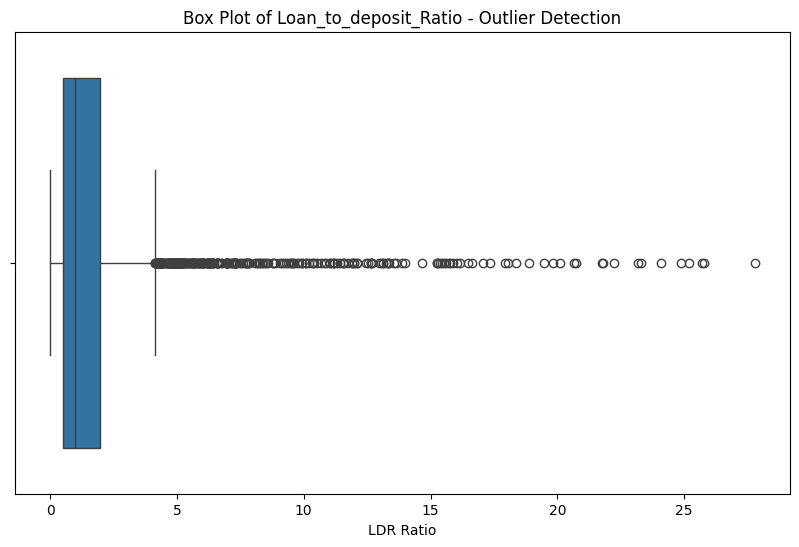

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['loan_to_deposit_ratio'])
plt.title('Box Plot of Loan_to_deposit_Ratio - Outlier Detection')
plt.xlabel('LDR Ratio')
plt.show()

3. **Loan-to-Income Ratio (LTI)** measures the proportion of income that is used to service debt obligations. To evaluate if a borrower is over-leveraged


In [21]:
df['loan_to_income_ratio'] = df['bank_loans'] / df['estimated_income']

In [22]:
print(df["loan_to_income_ratio"].describe())

count    3000.000000
mean        4.722867
std         4.607088
min         0.000000
25%         1.704879
50%         3.341786
75%         6.106007
max        41.215502
Name: loan_to_income_ratio, dtype: float64


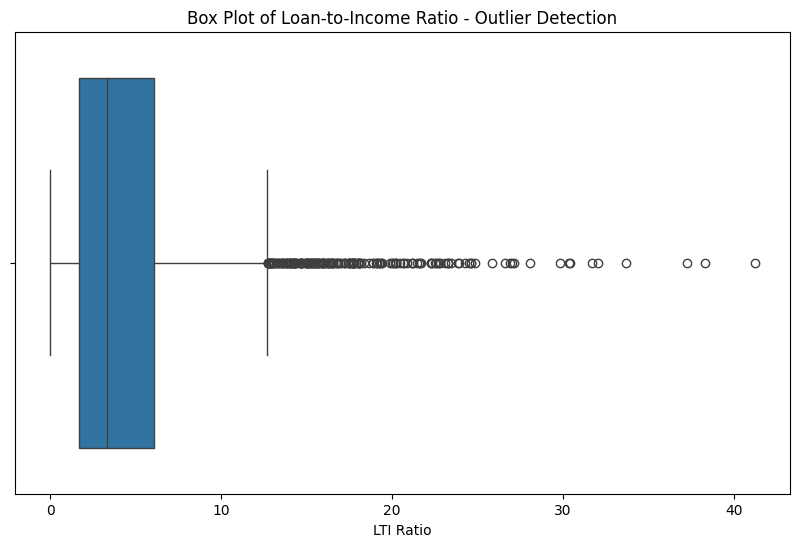

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['loan_to_income_ratio'])
plt.title('Box Plot of Loan-to-Income Ratio - Outlier Detection')
plt.xlabel('LTI Ratio')
plt.show()

4. **Debt-to-Income Ratio (DTI)** measures how many years (or annual income multiples) it would take someone to pay off all their debt if they used their entire annual income for debt repayment. It's a measure of debt burden relative to annual earning capacity.

In [24]:
df['Total_debts'] = df['bank_loans'] + df['credit_card_balance'] + df['business_lending']

In [25]:
df['Debt_to_Income_Ratio'] = (df['Total_debts'] / df['estimated_income'])

In [26]:
print(df["Debt_to_Income_Ratio"].describe())

count    3000.000000
mean       11.620902
std         9.681148
min         0.390730
25%         5.235480
50%         8.660067
75%        14.650743
max        93.523591
Name: Debt_to_Income_Ratio, dtype: float64



5. The **Debt-to-Asset Ratio** is a financial metric that measures the proportion of a company's total assets that are financed by debt. It indicates the degree of leverage and financial risk a company is taking.

In [27]:
df['total_liquid_assets'] = (
    df['bank_deposits'] +
    df['checking_accounts'] +
    df['saving_accounts'] +
    df['foreign_currency_account']
)

In [31]:
df['debt_to_asset_ratio'] = df['Total_debts'] / df['total_liquid_assets']

df['debt_to_asset_ratio'] = np.where(
    df['total_liquid_assets'] > 0,
    df['debt_to_asset_ratio'],
    np.nan
)
df['debt_to_asset_ratio'] = df['debt_to_asset_ratio'].replace([np.inf, -np.inf], np.nan)


df['debt_to_asset_ratio'] = df['debt_to_asset_ratio'].round(2)

In [33]:
print(df["debt_to_asset_ratio"].describe())

count    3000.000000
mean        3.153147
std        16.627252
min         0.050000
25%         0.770000
50%         1.230000
75%         2.300000
max       544.440000
Name: debt_to_asset_ratio, dtype: float64


6. Categorize the risk scores into qualitative **Risk levels**: Low, Medium, and High, based on the risk_score (1 to 5 scale)

In [34]:
df.rename(columns={'risk_weighting': 'risk_score'}, inplace=True)

def assign_risk_level(score):
    if score in [1, 2]:
        return "Low"
    elif score == 3:
        return "Medium"
    else:
        return "High"

df['risk_level'] = df['risk_score'].apply(assign_risk_level)

7. Define **Age segmentations** to identify behavioral patterns among different generations.

In [35]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 25, 35, 50, 65, 100],
    labels=['<=25', '26-35', '36-50', '51-65', '66+']
)

8. Define **Income band** boundaries

In [40]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Mid', 'High']

df['income_band'] = pd.cut(df['estimated_income'], bins=bins, labels=labels, include_lowest=True)

9. The consolidated Dataset will be saved as a single CSV file for subsequent analysis and modeling.

In [41]:
df.to_csv("Banking_final.csv", index=False)

# **Exploratory Data Analysis (EDA)**

In [42]:
df_analysis = pd.read_csv("/content/Banking_final.csv")
df_analysis.head()

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,years_with_bank,loan_to_deposit_ratio,loan_to_income_ratio,Total_debts,Debt_to_Income_Ratio,total_liquid_assets,debt_to_asset_ratio,risk_level,age_group,income_band
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,6,0.52,10.297079,1911202.76,25.352638,2709028.94,0.71,Low,<=25,Low
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,23,1.98,4.383937,3273398.41,11.294034,1276801.63,2.56,Medium,<=25,Mid
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,15,1.02,6.194806,1605422.16,9.447259,1968202.41,0.82,Medium,26-35,Mid
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,6,0.12,0.339665,1273802.35,3.569993,2388513.65,0.53,High,36-50,High
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,13,2.15,8.019956,2726493.56,20.858836,1092790.37,2.49,Medium,36-50,Mid


In [45]:
df_analysis.shape

(3000, 35)

In [46]:
df_analysis.columns

Index(['client_id', 'name', 'age', 'location_id', 'joined_bank',
       'banking_contact', 'nationality', 'occupation', 'fee_structure',
       'loyalty_classification', 'estimated_income', 'superannuation_savings',
       'amount_of_credit_cards', 'credit_card_balance', 'bank_loans',
       'bank_deposits', 'checking_accounts', 'saving_accounts',
       'foreign_currency_account', 'business_lending', 'properties_owned',
       'risk_score', 'gender', 'banking_relationship', 'investment_advisor',
       'years_with_bank', 'loan_to_deposit_ratio', 'loan_to_income_ratio',
       'Total_debts', 'Debt_to_Income_Ratio', 'total_liquid_assets',
       'debt_to_asset_ratio', 'risk_level', 'age_group', 'income_band'],
      dtype='object')

# Categorical Features Distribution

In [47]:
categorical_cols = df_analysis[[
    "risk_score",
    "nationality",
    "fee_structure",
    "loyalty_classification",
    "properties_owned",
    "income_band",
    "age_group",
    "risk_level"
]].columns

# Display value counts for each categorical column
for col in categorical_cols:
    print(f"\nValue Counts for '{col}':")
    display(df_analysis[col].value_counts(dropna=False))



Value Counts for 'risk_score':


,count
risk_score,
2,1222
1,836
3,460
4,322
5,160



Value Counts for 'nationality':


,count
nationality,
European,1309
Asian,754
American,507
Australian,254
African,176



Value Counts for 'fee_structure':


,count
fee_structure,
High,1476
Mid,962
Low,562



Value Counts for 'loyalty_classification':


,count
loyalty_classification,
Jade,1331
Silver,767
Gold,585
Platinum,317



Value Counts for 'properties_owned':


,count
properties_owned,
2,777
1,776
3,742
0,705



Value Counts for 'income_band':


,count
income_band,
Mid,1517
Low,1027
High,456



Value Counts for 'age_group':


,count
age_group,
66+,865
36-50,673
51-65,639
26-35,457
<=25,366



Value Counts for 'risk_level':


,count
risk_level,
Low,2058
High,482
Medium,460


# Numerical Features Summary

In [48]:
numerical_cols = [
    'estimated_income',
    'superannuation_savings',
    'amount_of_credit_cards',
    'credit_card_balance',
    'bank_loans',
    'bank_deposits',
    'checking_accounts',
    'saving_accounts',
    'foreign_currency_account',
    'business_lending',
    'properties_owned',
    'years_with_bank'
]

# Display summary statistics
df_analysis[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
estimated_income,3000.0,171305.034100,111935.808166,15919.48,82906.5950,142313.480,2.422903e+05,522330.26
superannuation_savings,3000.0,25531.599673,16259.950770,1482.03,12513.7750,22357.355,3.546474e+04,75963.90
amount_of_credit_cards,3000.0,1.463667,0.676387,1.00,1.0000,1.000,2.000000e+00,3.00
credit_card_balance,3000.0,3176.206713,2497.094713,1.17,1236.6300,2560.800,4.522632e+03,13991.99
bank_loans,3000.0,591386.155237,457557.036284,0.00,239628.1375,479793.400,8.258130e+05,2667556.66
bank_deposits,3000.0,671560.193867,645716.856860,0.00,204400.3750,463316.460,9.427546e+05,3890598.08
checking_accounts,3000.0,321092.949100,282079.553885,0.00,119947.5300,242815.655,4.348749e+05,1969923.08
saving_accounts,3000.0,232908.353473,230007.777492,0.00,74794.4050,164086.555,3.155750e+05,1724118.36
foreign_currency_account,3000.0,29883.529757,23109.923968,45.00,11916.5425,24341.190,4.196639e+04,124704.87
business_lending,3000.0,866759.808200,641230.321838,0.00,374825.1375,711314.660,1.185110e+06,3825961.94


# Visual EDA

1. Categorical variables visualization

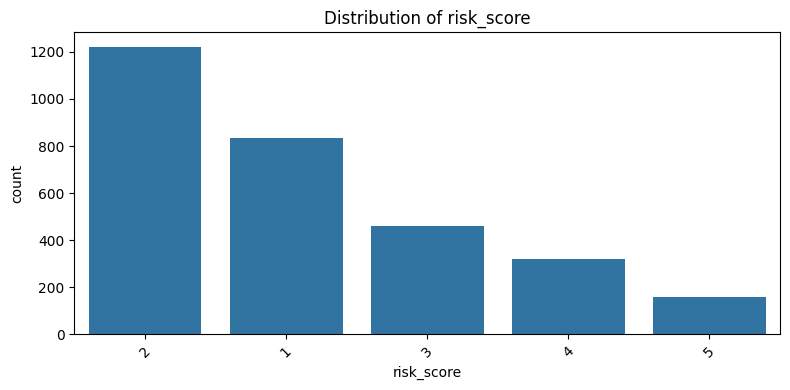

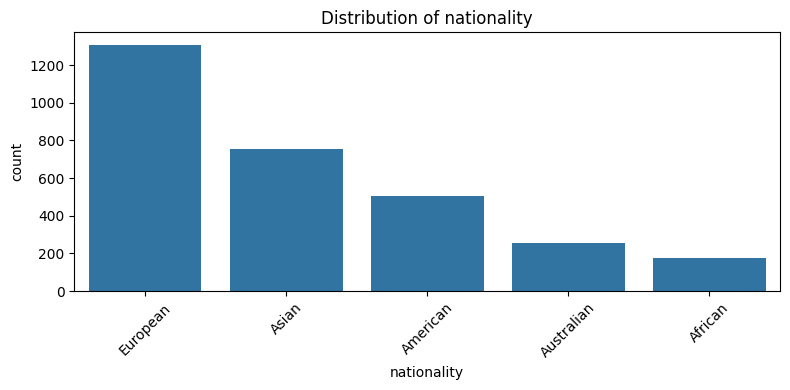

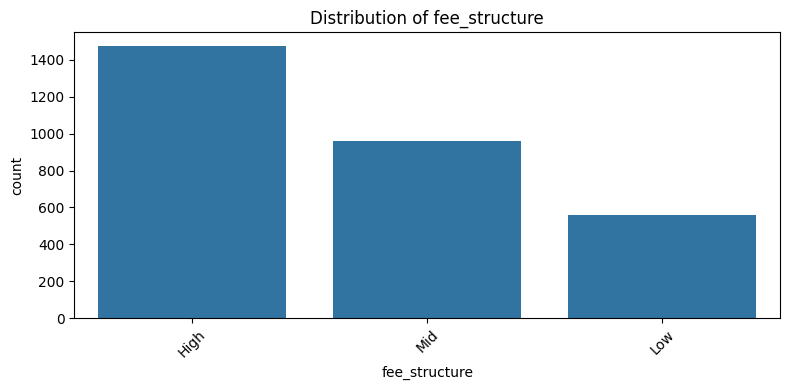

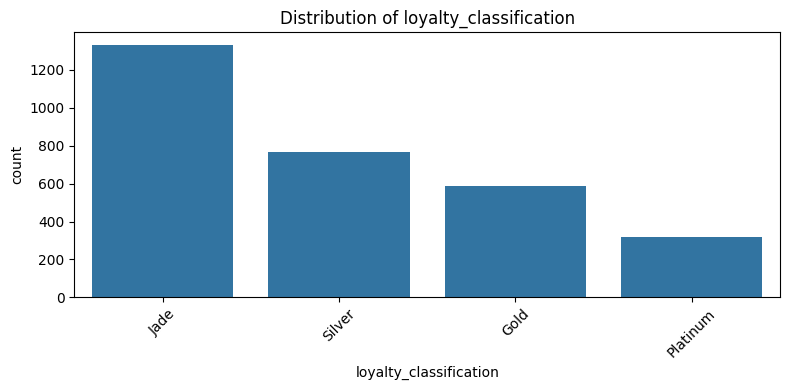

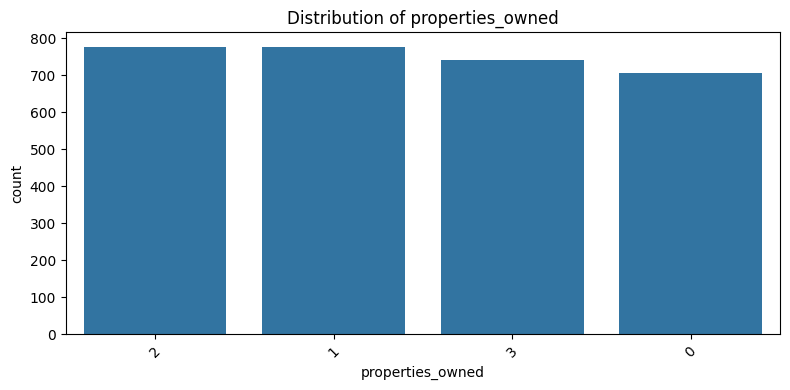

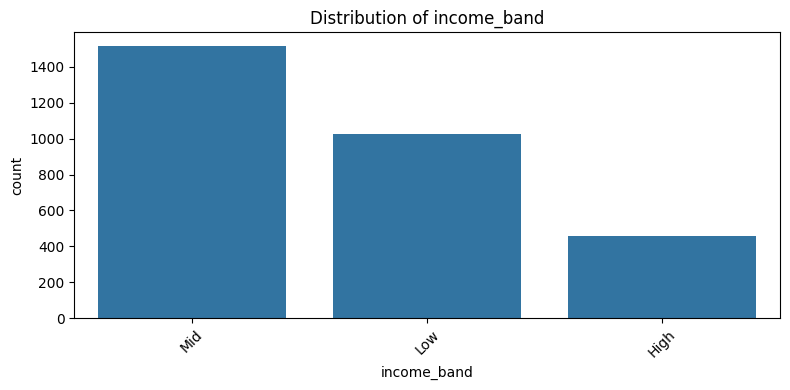

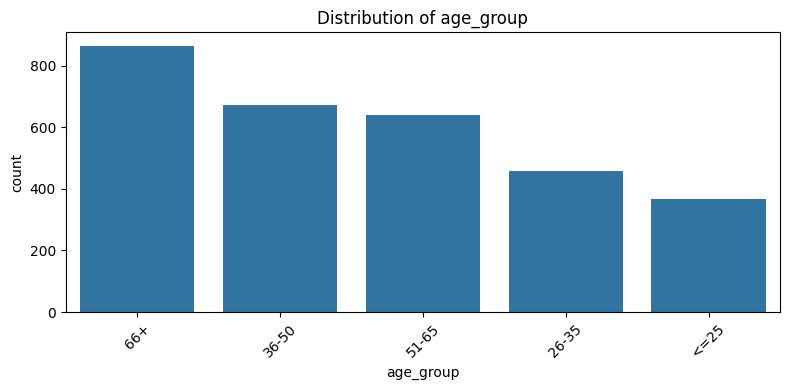

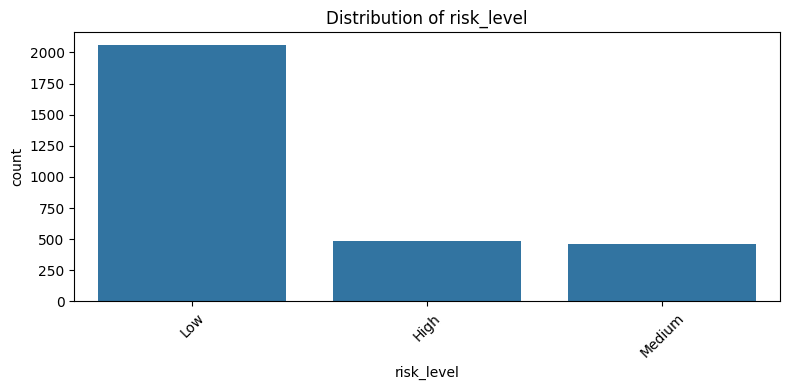

In [50]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_analysis, x=col, order=df_analysis[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


2. Univariate analysis and visualization

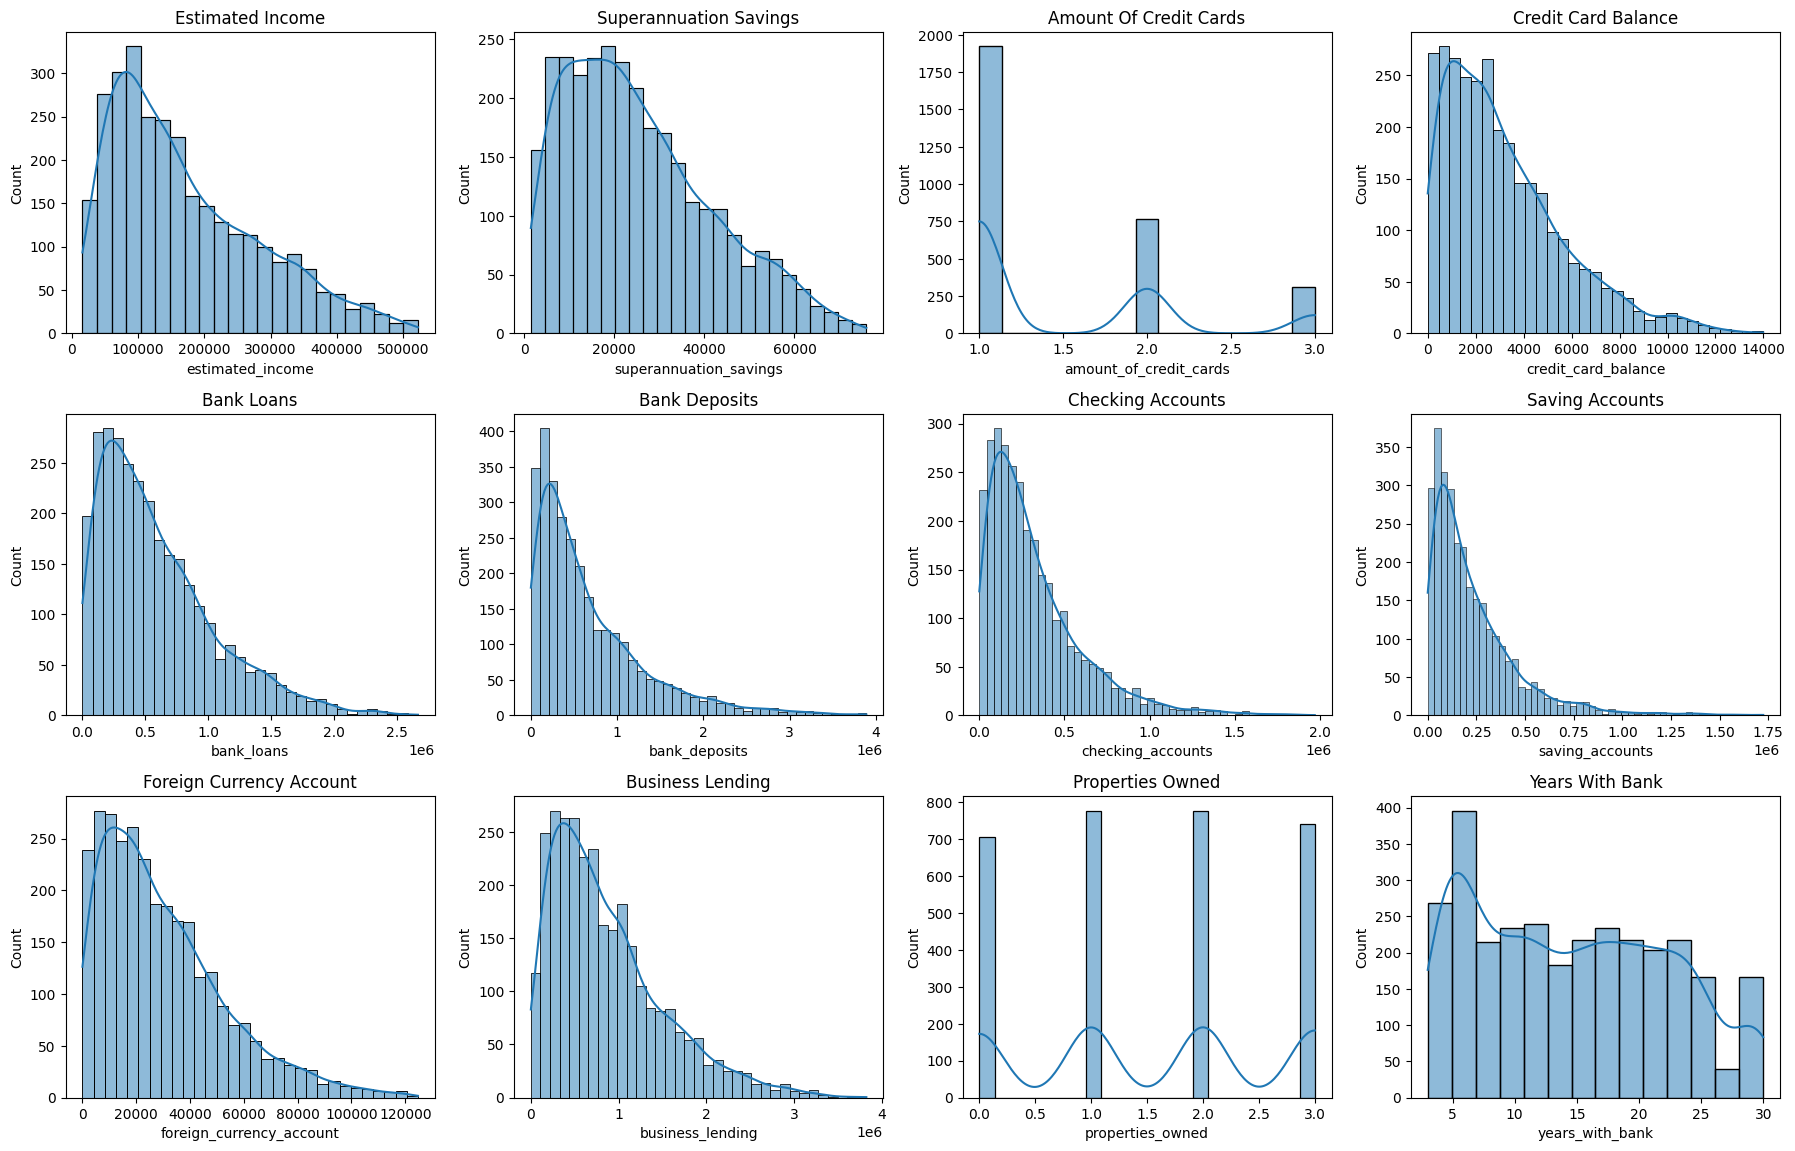

In [51]:
plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_analysis[col], kde=True)
    plt.title(col.replace("_", " ").title())
plt.tight_layout()
plt.show()

3. correlation analysis.

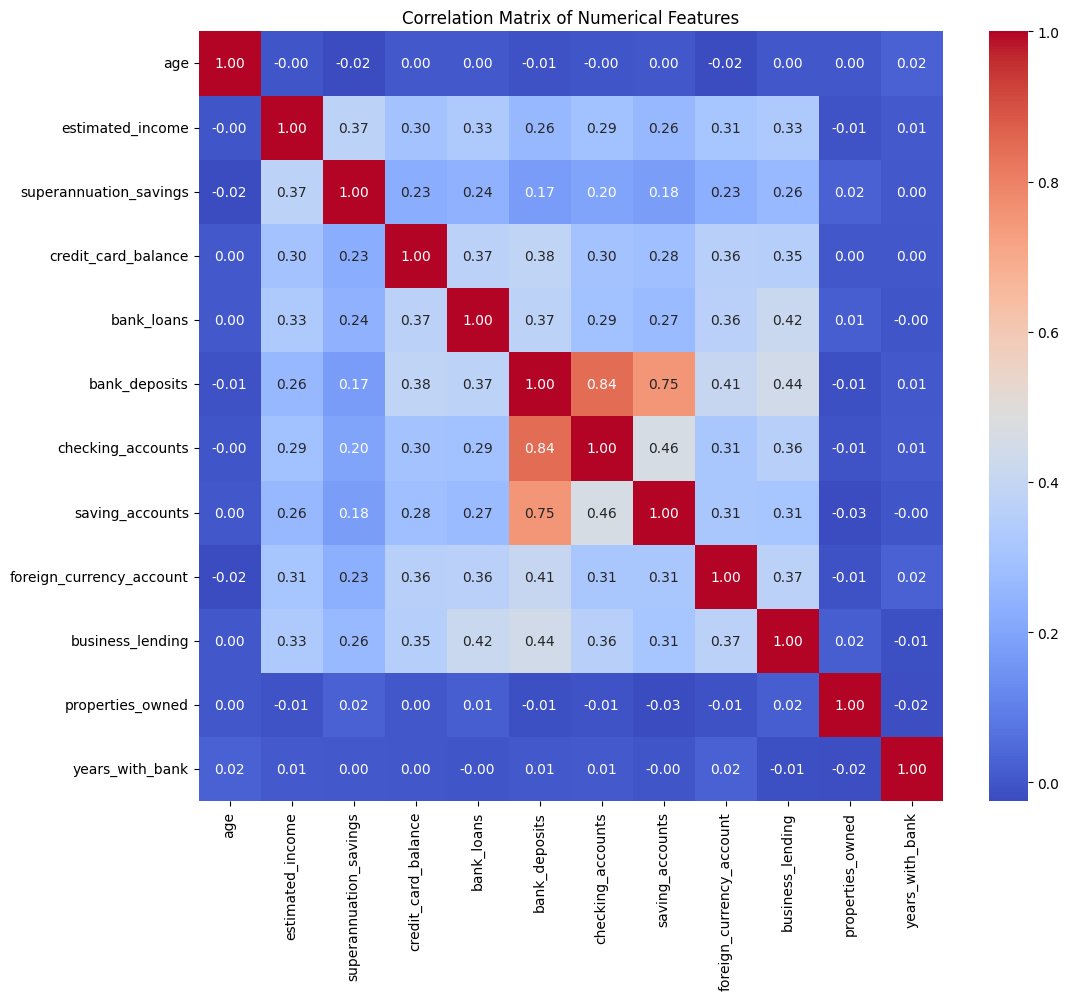

In [52]:
numerical_cols = ['age',
    'estimated_income',
    'superannuation_savings',
    'credit_card_balance',
    'bank_loans',
    'bank_deposits',
    'checking_accounts',
    'saving_accounts',
    'foreign_currency_account',
    'business_lending',
    'properties_owned',
    'years_with_bank']

# Calculate the correlation matrix
correlation_matrix = df_analysis[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

4. Bivariate analysis and visualization

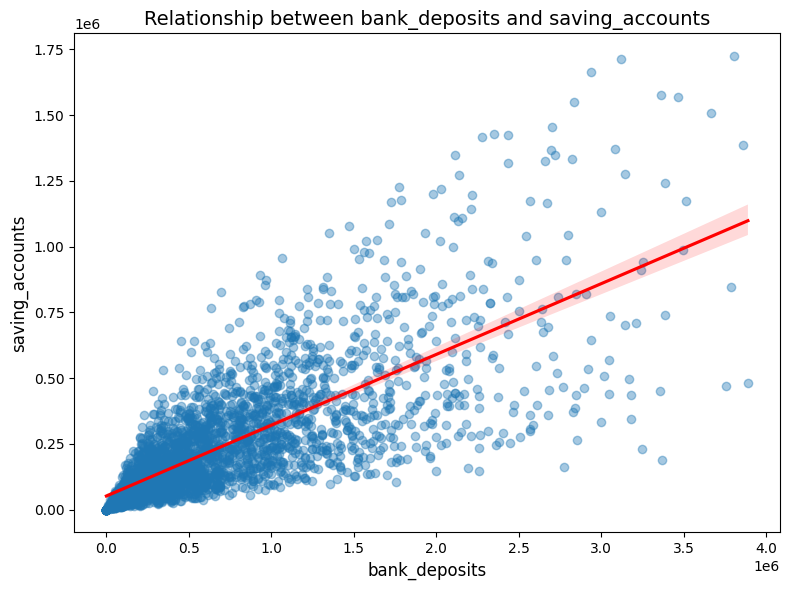

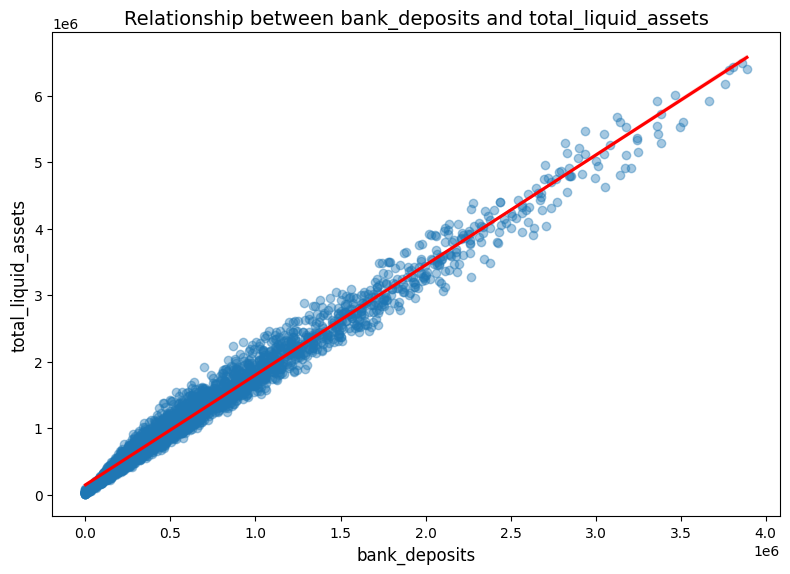

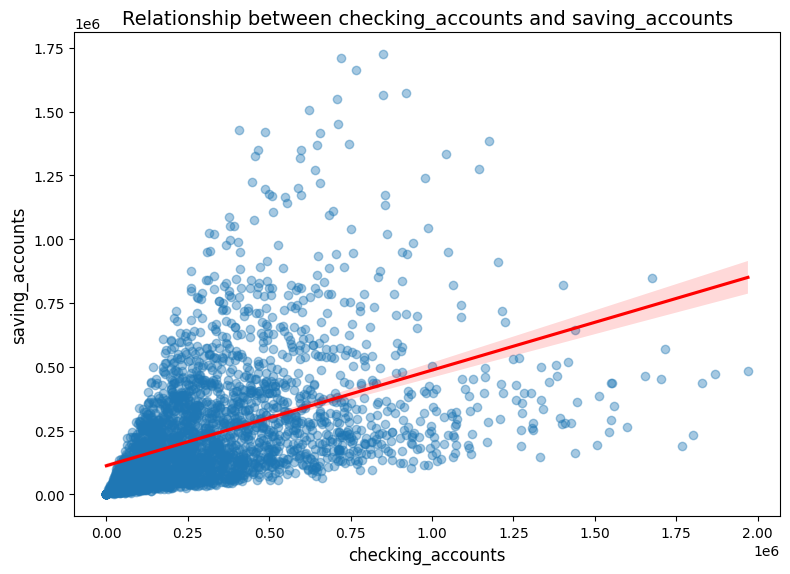

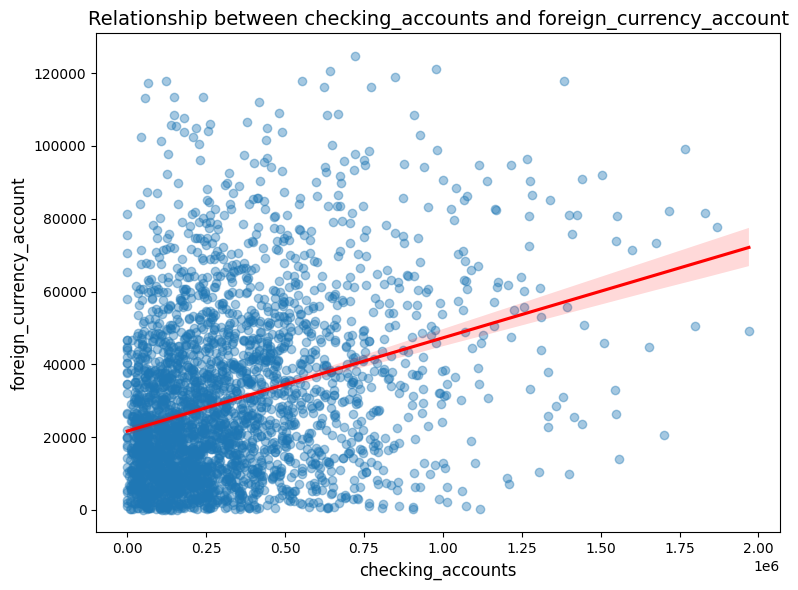

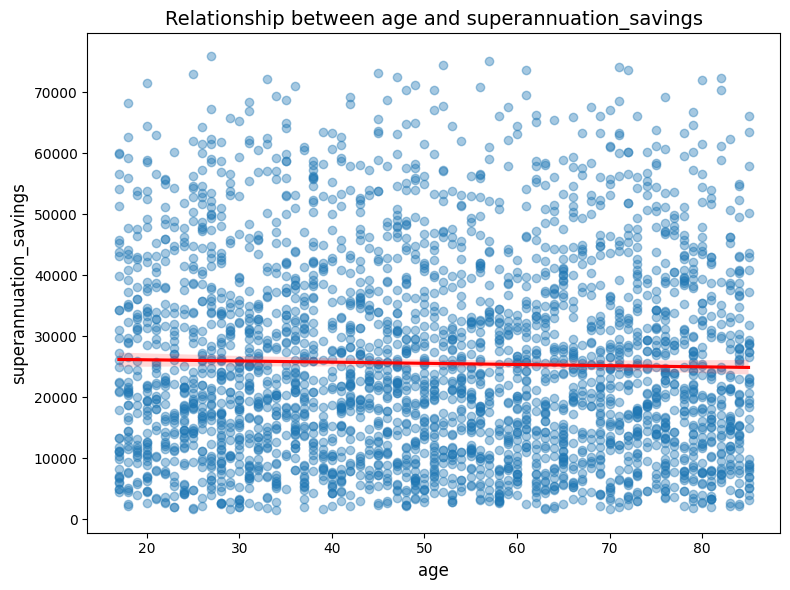

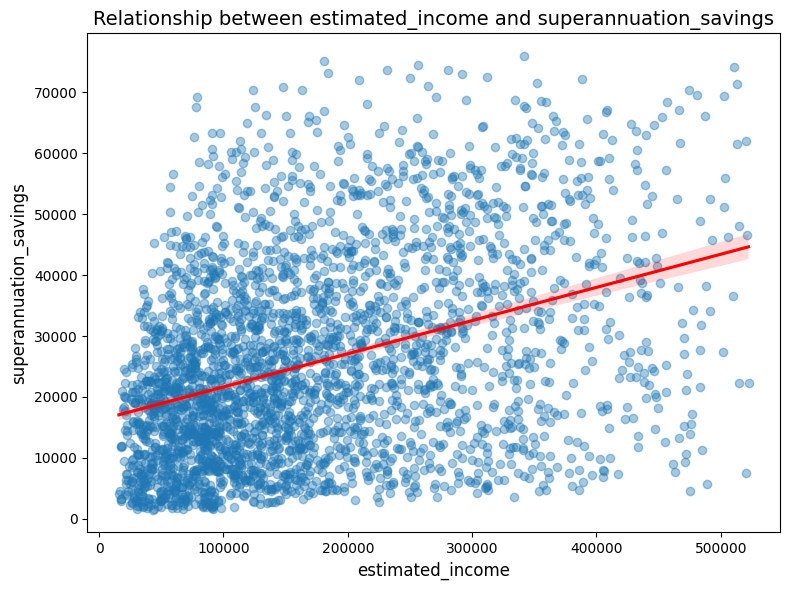

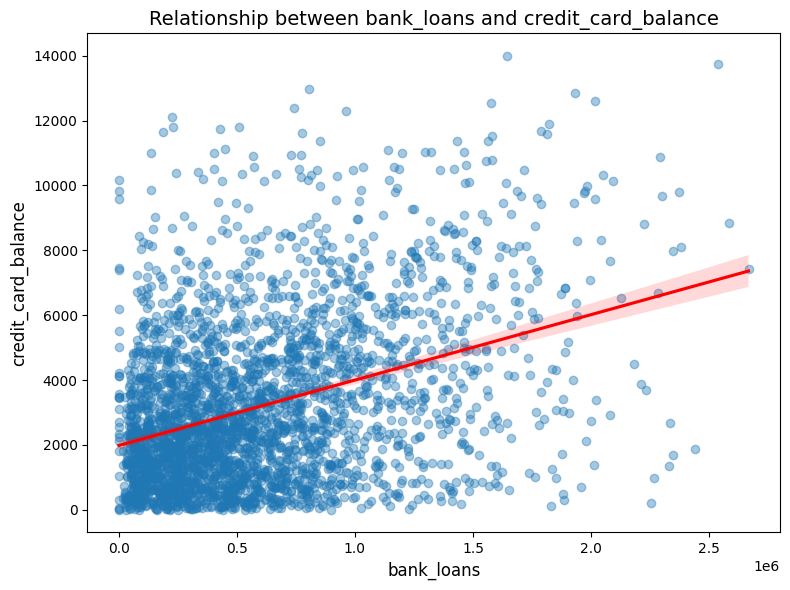

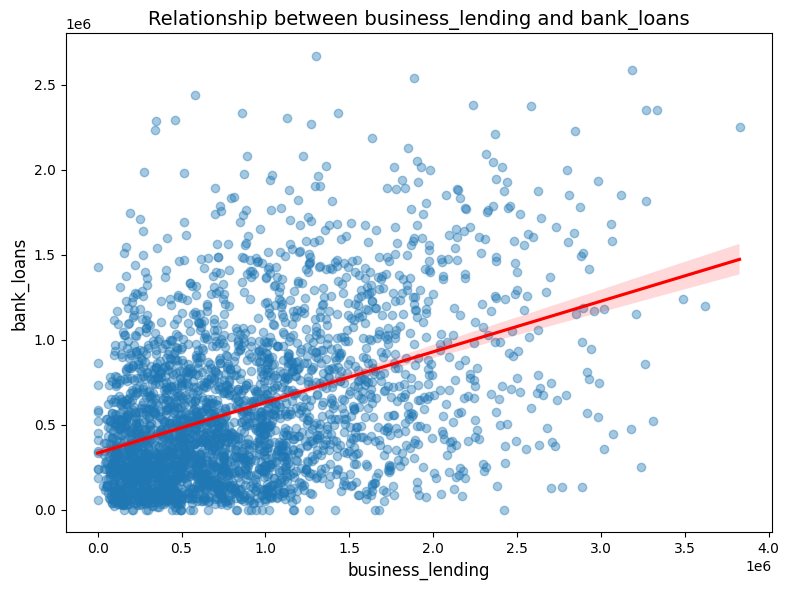

In [55]:
pairs_to_plot = [
    ('bank_deposits', 'saving_accounts'),
    ('bank_deposits', 'total_liquid_assets'),
    ('checking_accounts', 'saving_accounts'),
    ('checking_accounts', 'foreign_currency_account'),
    ('age', 'superannuation_savings'),
    ('estimated_income', 'superannuation_savings'),
    ('bank_loans', 'credit_card_balance'),
    ('business_lending', 'bank_loans'),
]

for x_col, y_col in pairs_to_plot:
    plt.figure(figsize=(8, 6))
    sns.regplot(
        data=df_analysis,
        x=x_col,
        y=y_col,
        scatter_kws={'alpha': 0.4},
        line_kws={'color': 'red'}
    )
    plt.title(f'Relationship between {x_col} and {y_col}', fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.tight_layout()
    plt.show()

# Key Findings from EDA and Correlation Analysis
- **Savings and Deposit Behavior**
There is a strong positive correlation between bank_deposits and saving_accounts, which suggests that customers who actively deposit money are also likely to maintain or increase savings balances. These variables may represent overlapping behaviors around liquidity management.

- **Age Lifecycle Effect**
Age shows near-zero correlation with almost all financial variables. Demographic factors (age, tenure) don't predict financial behavior in this dataset. Financial products are used similarly across age groups and customer tenure.

- **Business vs. Personal Banking**
business_lending shows a moderate correlation with bank_loans, indicating some customers have both personal and business credit exposure. However, it remains relatively uncorrelated with property ownership and deposits, suggesting business lending is relevant to a specialized subset of clients.

- **Low Correlation with Properties Owned**
properties_owned has low correlation with most financial variables, suggesting that real estate ownership might be influenced more by external factors (such as regional markets, inheritance, etc.) than by banking behavior alone.

- **Income Band**
The column income_band (Low, Mid, High) allows for segmentation of customer financial behavior. While it simplifies the estimated_income, it is very useful for grouping patterns in risk level, helping the bank identify creditworthiness trends.